# Logistic Regression
- It is a classification algorithm used to assign observations to a discrete set of classes.
- Ex: Email spam or not
- Discrete Observation
- Uses more complex cost function
- Sigmoid function : 1/(1+e^-z) 
- Z will be 0 or 1

## Model which can predict if a passenger is gonna survive

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

/home/ansari/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/ansari/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
from sklearn.linear_model import LogisticRegression

In [3]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Data Understanding

In [5]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

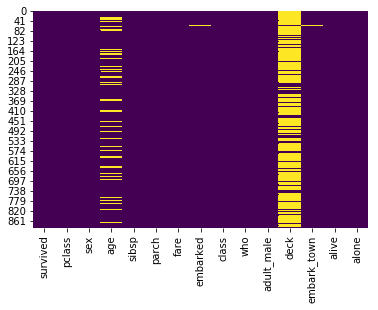

In [7]:
sns.heatmap(titanic.isnull(), cbar=False, cmap='viridis')

In [9]:
titanic['age'].isnull().sum()/titanic.shape[0]*100  #how much % data is missing

19.865319865319865

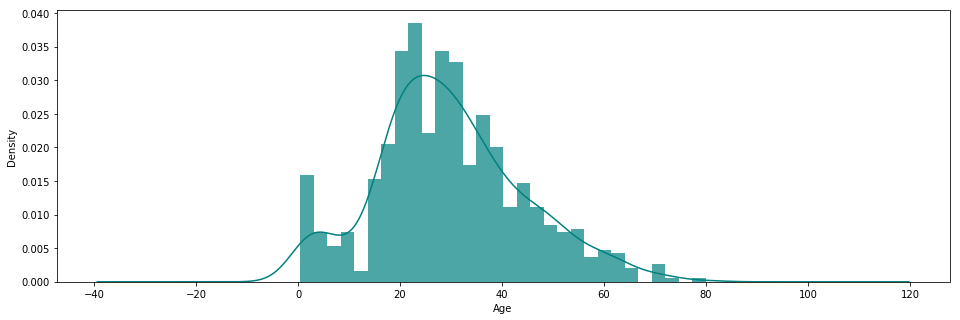

In [14]:
ax = titanic['age'].hist(bins=30, density=True, stacked=True, color='teal', alpha=0.7, figsize=(16,5)) #Histogram
titanic['age'].plot(kind='density', color='teal') #Density
ax.set_xlabel('Age')
plt.show()

Text(0.5,1,'Male')

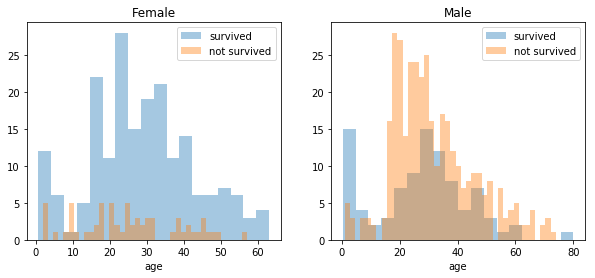

In [19]:
survived = 'survived'
not_survived = 'not survived'

fig,axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
women = titanic[titanic['sex'] == 'female']
men = titanic[titanic['sex'] == 'male']

ax = sns.distplot(women[women[survived]==1].age.dropna(), bins=18, label=survived, ax=axes[0], kde=False)
ax = sns.distplot(women[women[survived]==0].age.dropna(), bins=40, label=not_survived, ax=axes[0], kde=False)
ax.legend()
ax.set_title('Female')

ax = sns.distplot(men[men[survived]==1].age.dropna(), bins=18, label=survived, ax=axes[1], kde=False)
ax = sns.distplot(men[men[survived]==0].age.dropna(), bins=40, label=not_survived, ax=axes[1], kde=False)
ax.legend()
ax.set_title('Male')

In [20]:
titanic['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

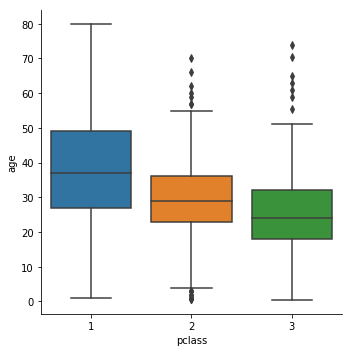

In [21]:
sns.catplot(x='pclass', y='age', data=titanic, kind='box')

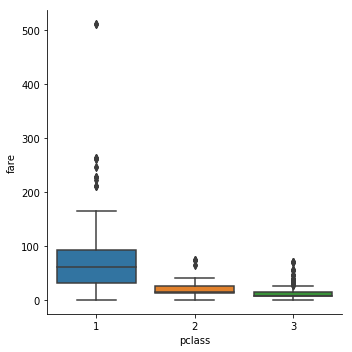

In [22]:
sns.catplot(x='pclass', y='fare', data=titanic, kind='box')

In [23]:
titanic[titanic['pclass'] == 1]['age'].mean() #1 class

38.233440860215055

In [24]:
titanic[titanic['pclass'] == 2]['age'].mean() #2 class

29.87763005780347

In [25]:
titanic[titanic['pclass'] == 3]['age'].mean() #3 class

25.14061971830986

In [26]:
def impute_age(cols):
    age = cols[0]
    pclass = cols[1]
    
    if pd.isnull(age):
        if pclass == 1:
            return titanic[titanic['pclass'] == 1]['age'].mean()
        elif pclass == 2:
            return titanic[titanic['pclass'] == 2]['age'].mean()
        elif pclass ==3:
            return titanic[titanic['pclass'] == 3]['age'].mean()
    else:
        return age

In [27]:
titanic['age'] = titanic[['age','pclass']].apply(impute_age, axis=1)

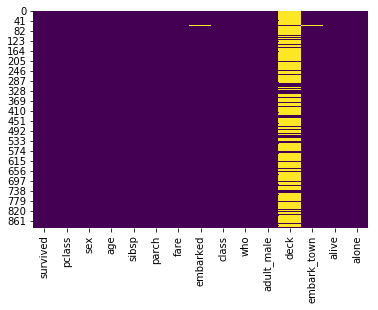

In [28]:
sns.heatmap(titanic.isnull(), cbar=False, cmap='viridis')

# Analysis

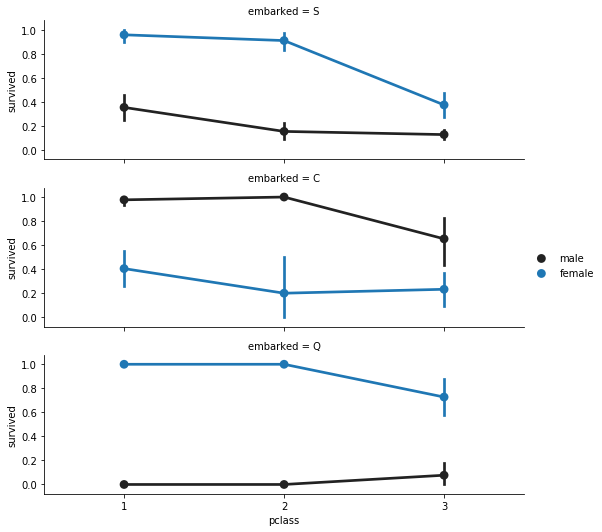

In [30]:
f = sns.FacetGrid(titanic, row='embarked', height=2.5, aspect=3)
f.map(sns.pointplot, 'pclass', 'survived', 'sex', order=None, hue_order=None)
f.add_legend()

In [34]:
titanic['embarked'].isnull().sum()

2

In [35]:
titanic['embark_town'].value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [36]:
common_value = 'S'
titanic['embarked'].fillna(common_value, inplace=True)

In [37]:
titanic['embarked'].isnull().sum()

0

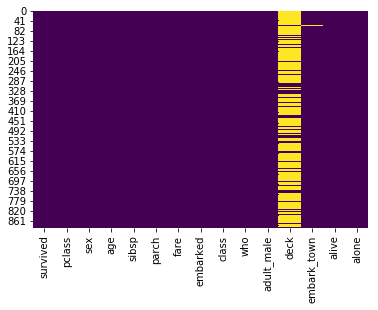

In [38]:
 sns.heatmap(titanic.isnull(), cbar=False, cmap='viridis')

In [39]:
titanic.drop(labels=['deck', 'embark_town', 'alive'], inplace=True, axis=1)

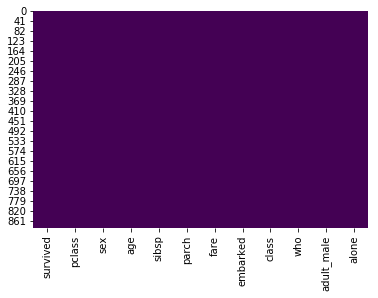

In [40]:
 sns.heatmap(titanic.isnull(), cbar=False, cmap='viridis')

In [41]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
survived      891 non-null int64
pclass        891 non-null int64
sex           891 non-null object
age           891 non-null float64
sibsp         891 non-null int64
parch         891 non-null int64
fare          891 non-null float64
embarked      891 non-null object
class         891 non-null category
who           891 non-null object
adult_male    891 non-null bool
alone         891 non-null bool
dtypes: bool(2), category(1), float64(2), int64(4), object(3)
memory usage: 65.4+ KB


In [42]:
titanic['fare'] = titanic['fare'].astype('int')
titanic['age'] = titanic['age'].astype('int')
titanic['pclass'] = titanic['pclass'].astype('int')

titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
survived      891 non-null int64
pclass        891 non-null int64
sex           891 non-null object
age           891 non-null int64
sibsp         891 non-null int64
parch         891 non-null int64
fare          891 non-null int64
embarked      891 non-null object
class         891 non-null category
who           891 non-null object
adult_male    891 non-null bool
alone         891 non-null bool
dtypes: bool(2), category(1), int64(6), object(3)
memory usage: 65.4+ KB


## Convert categorical data into numerical data

In [46]:
genders = {'male':0, 'female':1}
titanic['sex'] = titanic['sex'].map(genders)

In [47]:
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alone
0,0,3,0,22,1,0,7,S,Third,man,True,False
1,1,1,1,38,1,0,71,C,First,woman,False,False
2,1,3,1,26,0,0,7,S,Third,woman,False,True
3,1,1,1,35,1,0,53,S,First,woman,False,False
4,0,3,0,35,0,0,8,S,Third,man,True,True
5,0,3,0,25,0,0,8,Q,Third,man,True,True
6,0,1,0,54,0,0,51,S,First,man,True,True
7,0,3,0,2,3,1,21,S,Third,child,False,False
8,1,3,1,27,0,2,11,S,Third,woman,False,False
9,1,2,1,14,1,0,30,C,Second,child,False,False


In [48]:
who = {'man':0, 'women':1, 'child':2}
titanic['who'] = titanic['who'].map(who)

In [50]:
adult_male = {True:1, False:0}
titanic['adult_male'] = titanic['adult_male'].map(adult_male)

In [51]:
alone = {True:1, False:0}
titanic['alone'] = titanic['alone'].map(alone)

In [52]:
ports = {'S':0, 'C':1, 'Q':2}
titanic['embarked'] = titanic['embarked'].map(ports)

In [53]:
titanic.drop(labels=['class', 'who'], axis=1, inplace=True)

In [54]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,adult_male,alone
0,0,3,0,22,1,0,7,0,1,0
1,1,1,1,38,1,0,71,1,0,0
2,1,3,1,26,0,0,7,0,0,1
3,1,1,1,35,1,0,53,0,0,0
4,0,3,0,35,0,0,8,0,1,1


## build logistic regression model

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [56]:
X = titanic.drop('survived', axis=1)
y = titanic['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [58]:
X_train.shape

(596, 9)

In [60]:
model = LogisticRegression(solver='lbfgs', max_iter=200)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

In [61]:
model.score(X_test, y_test)

0.8271186440677966

## recusrsive feature elimination

In [63]:
from sklearn.feature_selection import RFE

In [64]:
model = LogisticRegression(solver='lbfgs', max_iter=200)
rfe = RFE(model, 5, verbose=1)  #SLEcting 5 features and step by 1
rfe = rfe.fit(X, y)

Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.


In [65]:
X.shape

(891, 9)

In [66]:
rfe.support_

array([ True, False, False,  True,  True, False, False,  True,  True])

In [67]:
titanic.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,adult_male,alone
0,0,3,0,22,1,0,7,0,1,0
1,1,1,1,38,1,0,71,1,0,0
2,1,3,1,26,0,0,7,0,0,1


In [68]:
 X.head()

,pclass,sex,age,sibsp,parch,fare,embarked,adult_male,alone
0,3,0,22,1,0,7,0,1,0
1,1,1,38,1,0,71,1,0,0
2,3,1,26,0,0,7,0,0,1
3,1,1,35,1,0,53,0,0,0
4,3,0,35,0,0,8,0,1,1


In [70]:
XX = X[X.columns[rfe.support_]]
XX.head()

,pclass,sibsp,parch,adult_male,alone
0,3,1,0,1,0
1,1,1,0,0,0
2,3,0,0,0,1
3,1,1,0,0,0
4,3,0,0,1,1


In [74]:
X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size=0.2, random_state=8, stratify=y) # stratify means y is qually distributed

In [75]:
X_train.shape

(712, 5)

In [76]:
model = LogisticRegression(solver='lbfgs', max_iter=500)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

model.score(X_test, y_test)

0.8547486033519553

## Accuracy, F1-score, P, R, AUC_ROC curve

In [77]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, auc, log_loss

In [78]:
model = LogisticRegression(solver='lbfgs', max_iter=500)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

In [79]:
y_predict_prob = model.predict_proba(X_test)[:,1]

In [80]:
[fpr, tpr, thr] = roc_curve(y_test, y_predict_prob)

In [82]:
print('Accuracy: ', accuracy_score(y_test, y_predict))
print('Logloss: ', log_loss(y_test,y_predict_prob))
print('Auc: ', auc(fpr, tpr))

Accuracy:  0.8547486033519553
Logloss:  0.36597373727139876
Auc:  0.9007246376811595


In [83]:
idx = np.min(np.where(tpr>0.95))
idx

26

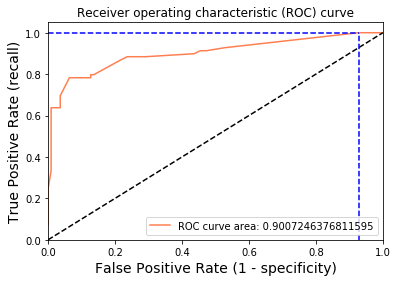

Using a threshold of 0.094 guarantees a sensitivity of 1.000 and a specificity of 0.073, i.e. a false positive rate of 92.73%.


In [86]:
plt.figure()
plt.plot(fpr, tpr, color = 'coral', label = "ROC curve area: " + str(auc(fpr, tpr)))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0, fpr[idx]], [tpr[idx], tpr[idx]], 'k--', color = 'blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()
print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx]+
      "and a specificity of %.3f" % (1-fpr[idx]) +
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))